In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
def readTxtFile(filename):
    return [line.rstrip("\n") for line in open(filename)]

listOfCoAuthors = readTxtFile("train.txt")

In [3]:
def genKey(author, coauthor):
    if author < coauthor: return str(author) + '-' + str(coauthor)
    else: return str(coauthor) + '-' + str(author)

In [4]:
def createEdgeListGraph(dataRow):
    dictionary = {}
    for row in dataRow:
        authorIds = [int(i) for i in row.split()]
        authorIds.sort()
        for i, author in enumerate(authorIds):
            for coauthor in authorIds[i+1:]:
                key = genKey(author,coauthor)
                if key in dictionary:
                    dictionary[key] = dictionary[key] + 1
                else:
                    dictionary[key] = 1
    return dictionary

countOfCoAuthors = createEdgeListGraph(listOfCoAuthors)

In [5]:
def sortCoAuthors(countDictionary):
    sortedAuthors = {}
    sortedKeys = sorted(countDictionary, key=countDictionary.get, reverse=True)
    for k in sortedKeys:
        sortedAuthors[k] = countDictionary[k]
    return sortedAuthors

sortedAuthors = sortCoAuthors(countOfCoAuthors)

In [6]:
sortedAuthors

{'898-1102': 45,
 '932-2861': 35,
 '2232-4038': 33,
 '233-1187': 32,
 '473-2775': 31,
 '26-1141': 30,
 '1056-3436': 30,
 '330-3130': 29,
 '477-2779': 29,
 '1240-1398': 28,
 '3445-3481': 28,
 '596-1264': 26,
 '2518-2864': 26,
 '1600-2519': 25,
 '1163-1398': 25,
 '1889-4038': 24,
 '1846-2436': 23,
 '1622-2071': 23,
 '1767-3459': 23,
 '1949-3556': 23,
 '2108-3165': 22,
 '3708-4069': 21,
 '1187-2682': 21,
 '534-3214': 21,
 '2307-3776': 20,
 '188-3944': 20,
 '245-2774': 20,
 '306-3605': 20,
 '495-1767': 19,
 '2706-3064': 19,
 '1595-1972': 19,
 '1408-3392': 19,
 '325-2237': 19,
 '1458-3276': 19,
 '722-3776': 19,
 '2982-3165': 19,
 '1056-2483': 19,
 '2012-2706': 19,
 '1398-3661': 18,
 '1143-3947': 18,
 '1517-1581': 18,
 '1090-2025': 18,
 '1477-3694': 18,
 '2072-2582': 18,
 '1432-2377': 18,
 '1451-3777': 17,
 '1850-3187': 17,
 '836-3947': 17,
 '3226-3947': 17,
 '1989-3713': 17,
 '585-2107': 16,
 '861-3926': 16,
 '2275-3365': 16,
 '932-2695': 16,
 '827-2884': 16,
 '3179-3444': 16,
 '2909-2966':

In [7]:
def calculateCoAuthorFrequency(sortedDictionary):
    v = {}
    for (key, value) in sortedAuthors.items():
        if value in v:
            v[value] = v[value] + 1
        else:
            v[value] = 1
    return v

frequency = calculateCoAuthorFrequency(sortedAuthors)

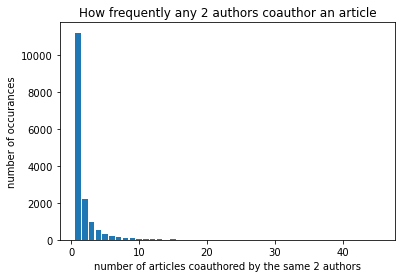

In [8]:
def understandData(frequencyData):
    plt.bar(frequencyData.keys(), frequencyData.values())
    plt.title('How frequently any 2 authors coauthor an article')
    plt.xlabel('number of articles coauthored by the same 2 authors')
    plt.ylabel('number of occurances')

understandData(frequency) # Show that most authors never coauthor again, and a few authors coauthors together a lot

In [9]:
def loadTestData(filename):
    d = pd.read_csv(filename)
    d['Lookup'] = d.apply(lambda x : genKey(x.Source,x.Sink), axis=1)
    return d

test = loadTestData('test-public.csv')

In [10]:
test.head()

,Id,Source,Sink,Lookup
0,1,0,2917,0-2917
1,2,0,2956,0-2956
2,3,1,4038,1-4038
3,4,2,1848,2-1848
4,5,3,513,3-513
